# Lead Scoring Case Study

#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor.


#### Aim
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goal of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Steps involved in building this Logisitic Regression model 
1. Reading and understanding data
2. Data cleaning and preparation
3. Preparing the data for modelling
    - Dummy Variable creation
4. Train-Test split
    - Rescaling the variables
5. Model building
6. Model evaluation
7. Prediction on the test set

## Step 1 : Reading and Understanding Data Set

In [1]:
# Importing the libraries required

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data set

Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Leads.shape

(9240, 37)

In [5]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2 : Data Cleaning and Preparation

In [7]:
# Checking for Null Values

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [8]:
cat_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City', 'Last Notable Activity']

In [9]:
# Before treating the NULL values, lets check for the value 'Select' in certain columns
# The value 'select' here means that the user has not entered/provided that information and hence it should be 
# considered as NULL value

for col in cat_cols:
    print(col)
    print(Leads[col].astype('category').value_counts())
    print("*"*50)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**************************************************
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
**************************************************
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conve

From above result we can see that columns - Specialization, How did you hear about X Education, Lead Profile, City have the values 'select' in them which needs to be treated as NULL values.

In [10]:
# Replaing 'Select' with np.nan

Leads = Leads.replace('Select', np.nan)

In [11]:
# Checking for Null Values after replacing 'Select' with NaN

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [12]:
# Dropping columns thats have more than 40% NULL values.

Leads.columns[Leads.isnull().mean() > 0.40]

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [13]:
# Finding the number of columns having NULL values greater than 40%

len(Leads.columns[Leads.isnull().mean() > 0.40])

7

In [14]:
# Dropping columns in Leads that have more than 40% null values (as the column with such high percentage 
# of null values can hamper the analysis)

Leads = Leads[Leads.columns[Leads.isnull().mean() < 0.40]]
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [15]:
Leads.shape

(9240, 30)

In [16]:
Leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
# check for duplicates in Prospect ID

sum(Leads.duplicated(subset = 'Prospect ID'))

0

In [18]:
# check for duplicates in Lead Number

sum(Leads.duplicated(subset = 'Lead Number'))

0

In [19]:
# Dropping columns that are all/almost filled with NO as their value [1 category being dominated]
# Dropping Prospect ID and Lead Number as they are Unique identifiers and will not help in the analysis further
# Adding all non-significant columns to the list as well - country and city

cols_NO = ['Prospect ID', 'Lead Number', 'Do Not Call', 'Country', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque']
len(cols_NO)

16

In [20]:
# Dropping the above columns as it is of no use to us

Leads.drop(cols_NO, axis = 1, inplace = True)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,Interested in other courses,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,No,Modified


In [21]:
Leads.shape

(9240, 14)

In [22]:
# Checking for Null Values

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

#### Handling missing values in 'What matters most to you in choosing a course' column

In [23]:
# Checking for null values in the 'What matters most to you in choosing a course' column.

Leads["What matters most to you in choosing a course"].isnull().sum()

2709

In [24]:
# Fetch the percentage of each 'What matters most to you in choosing a course' category in the data frame Leads.

Leads["What matters most to you in choosing a course"].value_counts(normalize = True, dropna = False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
# Find the mode of 'What matters most to you in choosing a course' in Leads

Course_mode=Leads["What matters most to you in choosing a course"].mode()[0]
Course_mode

'Better Career Prospects'

Filling with Mode value

In [26]:
# Filling the missing values with mode value of 'What matters most to you in choosing a course' in Leads.

Leads["What matters most to you in choosing a course"].fillna(Course_mode, inplace = True)

In [27]:
# Checking for null values in the 'What matters most to you in choosing a course' column after replacing with Mode.

Leads["What matters most to you in choosing a course"].isnull().sum()

0

In [28]:
# Fetch the percentage of each 'What matters most to you in choosing a course' category in the data frame Leads after replacing

Leads["What matters most to you in choosing a course"].value_counts(normalize = True)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

#### Dropping variable 'What matters most to you in choosing a course' as 'Better Career Prospects' is more than 99% of the values [dominated by 1 category] and this would not help in any further analysis

In [29]:
# Dropping the variable

Leads.drop(["What matters most to you in choosing a course"], axis = 1, inplace = True)

In [30]:
Leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [31]:
# Checking for Null Values

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### Handling missing values in Specialization column

In [32]:
# Checking for null values in the Specialization column.

Leads["Specialization"].isnull().sum()

3380

In [33]:
# Fetch the percentage of each 'Specialization' category in the data frame Leads.

Leads["Specialization"].value_counts(normalize = True, dropna = False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [34]:
# Replacing the NaN values with 'Not specified' as even Mode here cannot help

Leads['Specialization'] = Leads['Specialization'].replace(np.nan,'Not Specified')

In [35]:
# Fetch the percentage of each 'Specialization' category in the data frame Leads.

Leads["Specialization"].value_counts(normalize = True, dropna = False)*100

Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

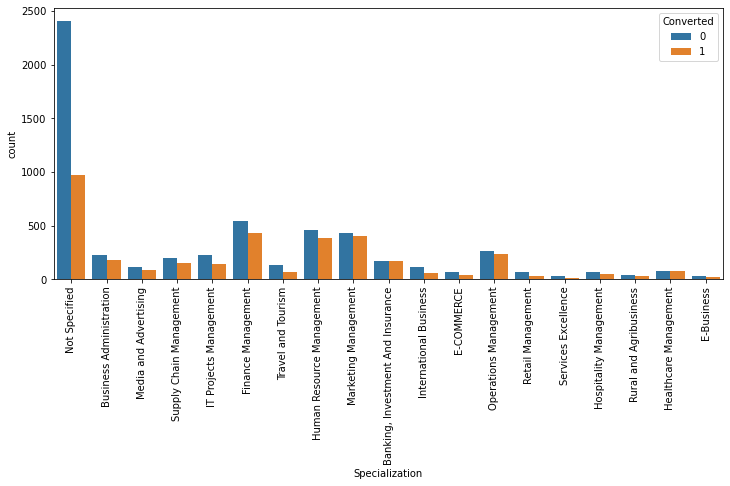

In [36]:
# Viewing the graph for specialization to see the spread of the categories 

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Specialization', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

There are many management courses which are present with a good conversion rate, combining them into a single entity would be beneficial for further analysis. Also, a few Business courses as well a can be combined together.

In [37]:
Leads['Specialization'] = Leads['Specialization'].replace(['Supply Chain Management','IT Projects Management',
                                                           'Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'Retail Management','Hospitality Management',
                                                           'Healthcare Management'], 'Management_Cores')

Leads['Specialization'] = Leads['Specialization'].replace(['International Business','Rural and Agribusiness','E-Business'],
                                                          'Business_Cores')

In [38]:
Leads.Specialization.value_counts()

Management_Cores                     4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Business_Cores                        308
Media and Advertising                 203
Travel and Tourism                    203
E-COMMERCE                            112
Services Excellence                    40
Name: Specialization, dtype: int64

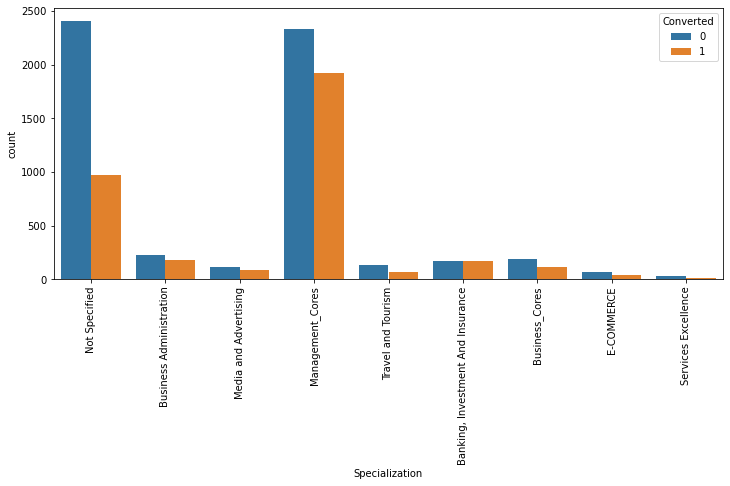

In [39]:
# Viewing the graph for specialization to see the spread of the categories after combining

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Specialization', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Checking for Null Values

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

Tags                                      36.29
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Specialization                             0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### Handling missing values in Tags column

In [41]:
# Checking for null values in the Tags column.

Leads["Tags"].isnull().sum()

3353

In [42]:
# Fetch the percentage of each 'Tags' category in the data frame Leads.

Leads["Tags"].value_counts(normalize = True, dropna = False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [43]:
# Replacing the NaN values with 'Not specified'

Leads['Tags'] = Leads['Tags'].replace(np.nan,'Not Specified')

In [44]:
# Fetch the percentage of each 'Tags' category in the data frame Leads.

Leads["Tags"].value_counts(normalize = True, dropna = False)*100

Not Specified                                        36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

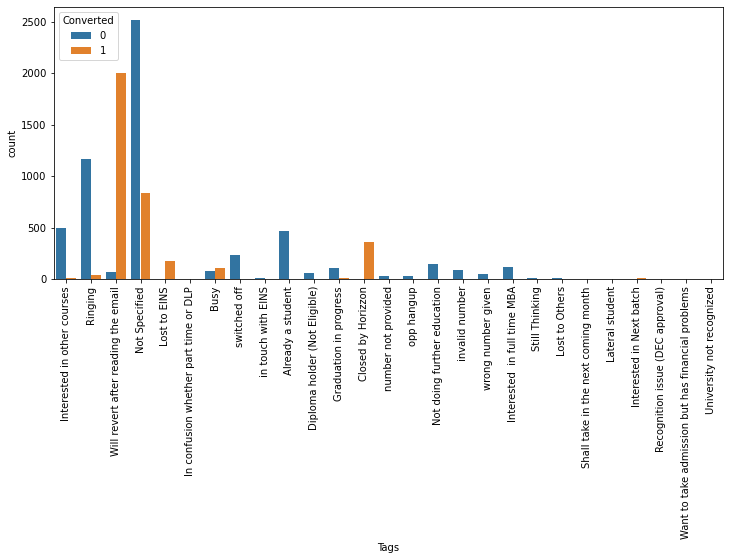

In [45]:
#Viewing the graph for Tags to see the spread of the categories 

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Tags', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

There are many Tags which do not add any value to our analysis, so combining them will benefit our analysis further.

In [46]:
Leads['Tags'] = Leads['Tags'].replace(['Interested in other courses','In confusion whether part time or DLP','switched off',
                                       'in touch with EINS','Already a student','Diploma holder (Not Eligible)',
                                       'Graduation in progress','number not provided','opp hangup',
                                       'Not doing further education','invalid number','wrong number given',
                                       'Interested  in full time MBA','Still Thinking','Lost to Others',
                                       'Shall take in the next coming month','Lateral student','Interested in Next batch',
                                       'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                       'University not recognized'], 'Other_Tags')

In [47]:
Leads.Tags.value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1893
Ringing                                1203
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

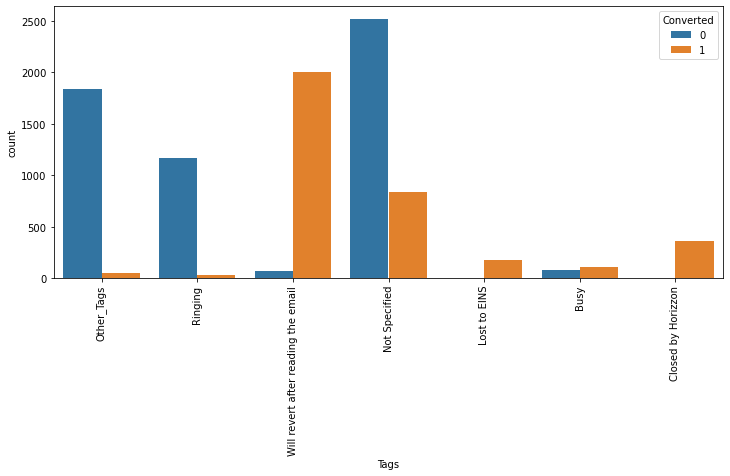

In [48]:
# Viewing the graph for Tags to see the spread of the categories after combining

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Tags', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

In [49]:
# Checking for Null Values

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Specialization                             0.00
Tags                                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### Handling missing values in 'What is your current occupation' column

In [50]:
# Checking for null values in the 'What is your current occupation' column.

Leads["What is your current occupation"].isnull().sum()

2690

In [51]:
# Fetch the percentage of each 'What is your current occupation' category in the data frame Leads.

Leads["What is your current occupation"].value_counts(normalize = True, dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [52]:
# Replacing the NaN values with 'Unemployed'

Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [53]:
# Fetch the percentage of each 'What is your current occupation' category in the data frame Leads.

Leads["What is your current occupation"].value_counts(normalize = True, dropna = False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [54]:
# Checking for Null Values

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Handling missing values in TotalVisits column

In [55]:
# Checking for null values in the TotalVisits column.

Leads["TotalVisits"].isnull().sum()

137

In [56]:
# Calculate the percentage of missing values in TotalVisits column.

(Leads["TotalVisits"].isnull().sum()/Leads.shape[0]) * 100

1.4826839826839828

In [57]:
# Drop the records with TotalVisits missing in dataframe Leads as the number of missing rows are insignificant.

Leads = Leads[-Leads["TotalVisits"].isnull()]
Leads.shape

(9103, 13)

In [58]:
# Checking for null values in the TotalVisits column.

Leads["TotalVisits"].isnull().sum()

0

In [59]:
# Checking for Null Values

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

Lead Source                               0.32
Lead Origin                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Handling missing values in Lead Source column

In [60]:
# Checking for null values in the Lead Source column.

Leads["Lead Source"].isnull().sum()

29

In [61]:
# Calculate the percentage of missing values in Lead Source column.

(Leads["Lead Source"].isnull().sum()/Leads.shape[0]) * 100

0.31857629352960565

In [62]:
# Drop the records with Lead Source missing in dataframe Leads as the number of missing rows are insignificant.

Leads = Leads[-Leads["Lead Source"].isnull()]
Leads.shape

(9074, 13)

In [63]:
# Checking for null values in the Lead Source column.

Leads["Lead Source"].isnull().sum()

0

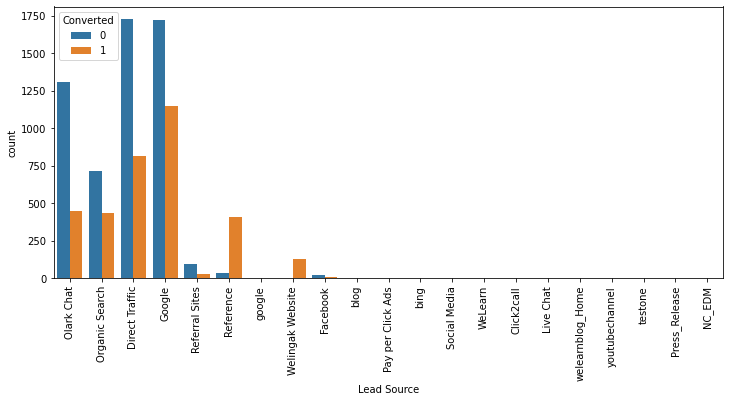

In [64]:
# Viewing the graph for Lead Source to see the spread of the categories 

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

There are many categories which add no value to the conversion/non-conversion of the leads. Combining them as one entity would help in further analysis while creating dummy variables.

In [65]:
Leads['Lead Source'] = Leads['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn',
                                                     'Click2call','Live Chat','welearnblog_Home','youtubechannel',
                                                     'testone','Press_Release','NC_EDM'], 'Other_Lead_Source')

Leads['Lead Source'] = Leads['Lead Source'].replace(['google'],'Google')

Leads['Lead Source'] = Leads['Lead Source'].replace(['Facebook'],'Socail Media')

In [66]:
Leads["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Socail Media           31
Other_Lead_Source      23
Name: Lead Source, dtype: int64

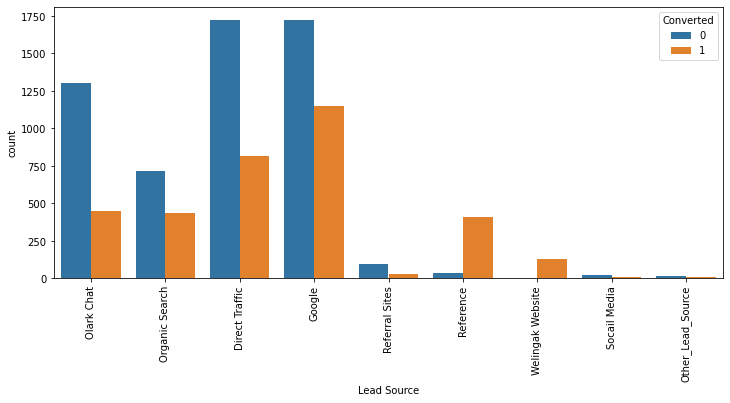

In [67]:
# Viewing the graph for Lead Source to see the spread of the categories after combining

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

In [68]:
# Checking for Null Values

round(Leads.isnull().sum()/len(Leads)*100,2).sort_values(ascending=0)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [69]:
# All the NULL values have been eliminated and just to check the data, show head()

Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Other_Tags,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,No,Modified


#### Last Activity

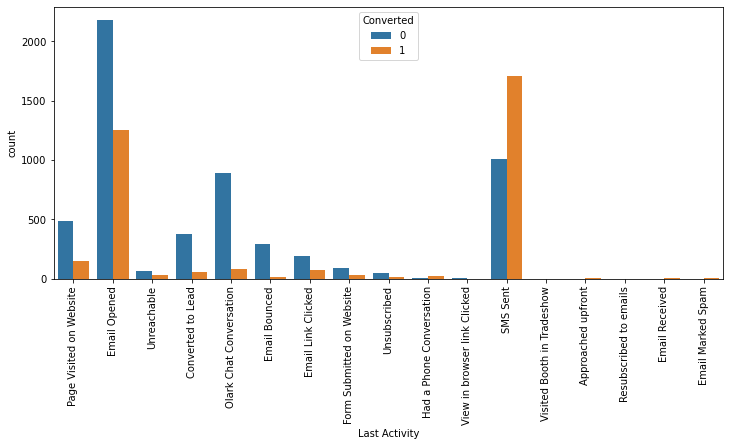

In [70]:
# Viewing the graph for Last Activity to see the spread of the categories 

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Last Activity', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

There are many Last Activity categories which do not add any value to our analysis, so combining them will benefit our analysis further.

In [71]:
Leads['Last Activity'] = Leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                         'Visited Booth in Tradeshow','Approached upfront',
                                                         'Resubscribed to emails','Email Received','Email Marked Spam'], 
                                                        'Other_Last_Activity')

In [72]:
Leads['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Last_Activity            42
Name: Last Activity, dtype: int64

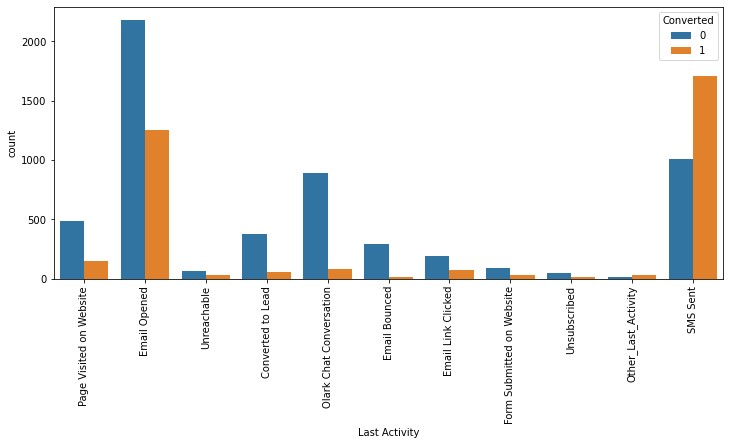

In [73]:
# Viewing the graph for Last Activity to see the spread of the categories after combining

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Last Activity', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

#### Last Notable Activity

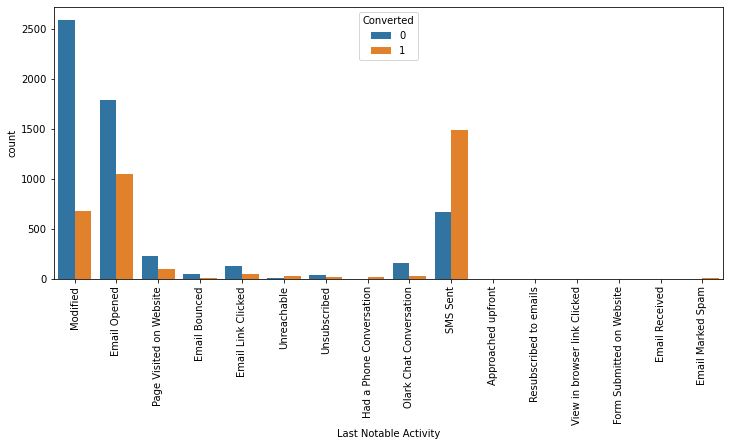

In [74]:
# Viewing the graph for Last Notable Activity to see the spread of the categories 

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Last Notable Activity', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

There are many Last Notable Activity categories which do not add any value to our analysis, so combining them will benefit our analysis further.

In [75]:
Leads['Last Notable Activity'] = Leads['Last Notable Activity'].replace(['Had a Phone Conversation','Approached upfront',
                                                                         'Resubscribed to emails',
                                                                         'View in browser link Clicked',
                                                                         'Form Submitted on Website','Email Received',
                                                                         'Email Marked Spam'], 
                                                        'Other_Last_Notable_Activity')

In [76]:
Leads['Last Notable Activity'].value_counts()

Modified                       3267
Email Opened                   2823
SMS Sent                       2152
Page Visited on Website         318
Olark Chat Conversation         183
Email Link Clicked              173
Email Bounced                    60
Unsubscribed                     45
Unreachable                      32
Other_Last_Notable_Activity      21
Name: Last Notable Activity, dtype: int64

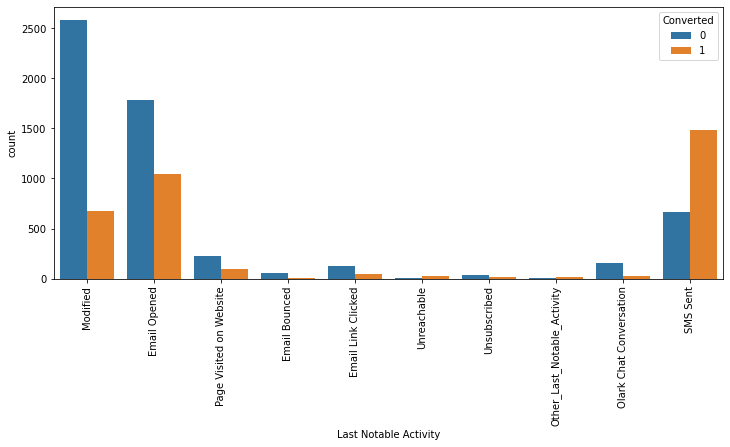

In [77]:
# Viewing the graph for Last Notable Activity to see the spread of the categories after combining

plt.figure(figsize=(12,5))
sns.countplot(data = Leads, x = 'Last Notable Activity', hue = 'Converted')
plt.xticks(rotation=90)
plt.show()

In [78]:
def YesNoAbb(x) :
    if(x == 'Yes') :
        return 1
    elif(x == 'No') :
        return 0

In [79]:
# Converting the categorical variable 'Do Not Email' Yes/No -> 1/0

Leads["Do Not Email"] = Leads["Do Not Email"].apply(lambda x : YesNoAbb(x))
Leads["Do Not Email"].head()

0    0
1    0
2    0
3    0
4    0
Name: Do Not Email, dtype: int64

In [80]:
# Converting the categorical variable 'A free copy of Mastering The Interview' Yes/No -> 1/0

Leads["A free copy of Mastering The Interview"] = Leads["A free copy of Mastering The Interview"].apply(lambda x : YesNoAbb(x))
Leads["A free copy of Mastering The Interview"].head()

0    0
1    0
2    1
3    0
4    0
Name: A free copy of Mastering The Interview, dtype: int64

In [81]:
Leads.shape

(9074, 13)

Since the data has no more NULL values, let's check the percentage of rows retained after the data cleaning process.

In [82]:
len(Leads.index)/9240

0.982034632034632

##### 98% of the rows are still intact, which is good for further analysis

### Visualizing the Data

In [83]:
Leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [84]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Other_Tags,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


In [85]:
# Creating a dataframe for numerical values

num_var = Leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]

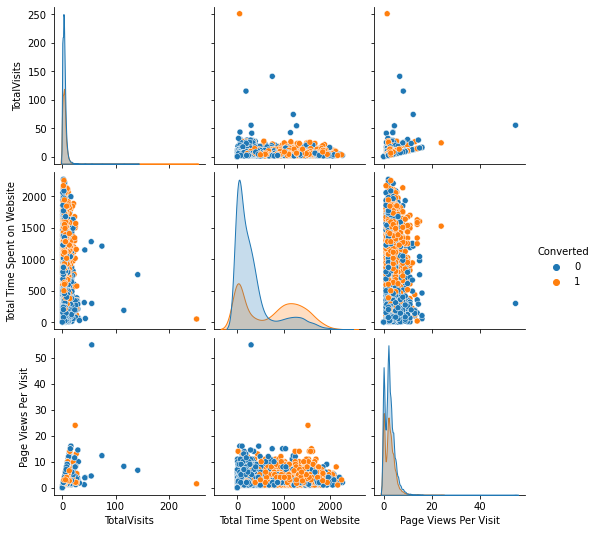

In [86]:
# Visualizing numerical variables - pairplot

sns.pairplot(num_var, hue='Converted')
plt.show()

Observations :

    1. There seems to be a slight co-relation between TotalVisits and Page Views Per Visit.
    2. Total Time Spent on Website seems propotional to the conversion.
    3. There is not much linear relationship between these variables.

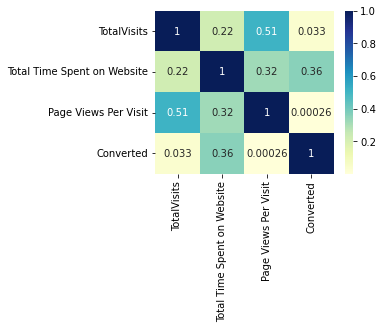

In [87]:
# Let's check the correlation coefficients for numeric variables to see which variables are highly correlated

plt.figure(figsize=(4,3))
sns.heatmap(num_var.corr(), cmap="YlGnBu", annot=True)
plt.show()

Observations :
    
    1. As mentioned above we can see that TotalViews and Page Views Per Visit have little corelation of 0.51
    2. Total Time Spent on Website has a correlation to Converted, 0.36

In [88]:
# Creating a list for categorical variables

cat_var = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'Tags', 
                 'What is your current occupation', 'A free copy of Mastering The Interview', 
                 'Last Notable Activity']

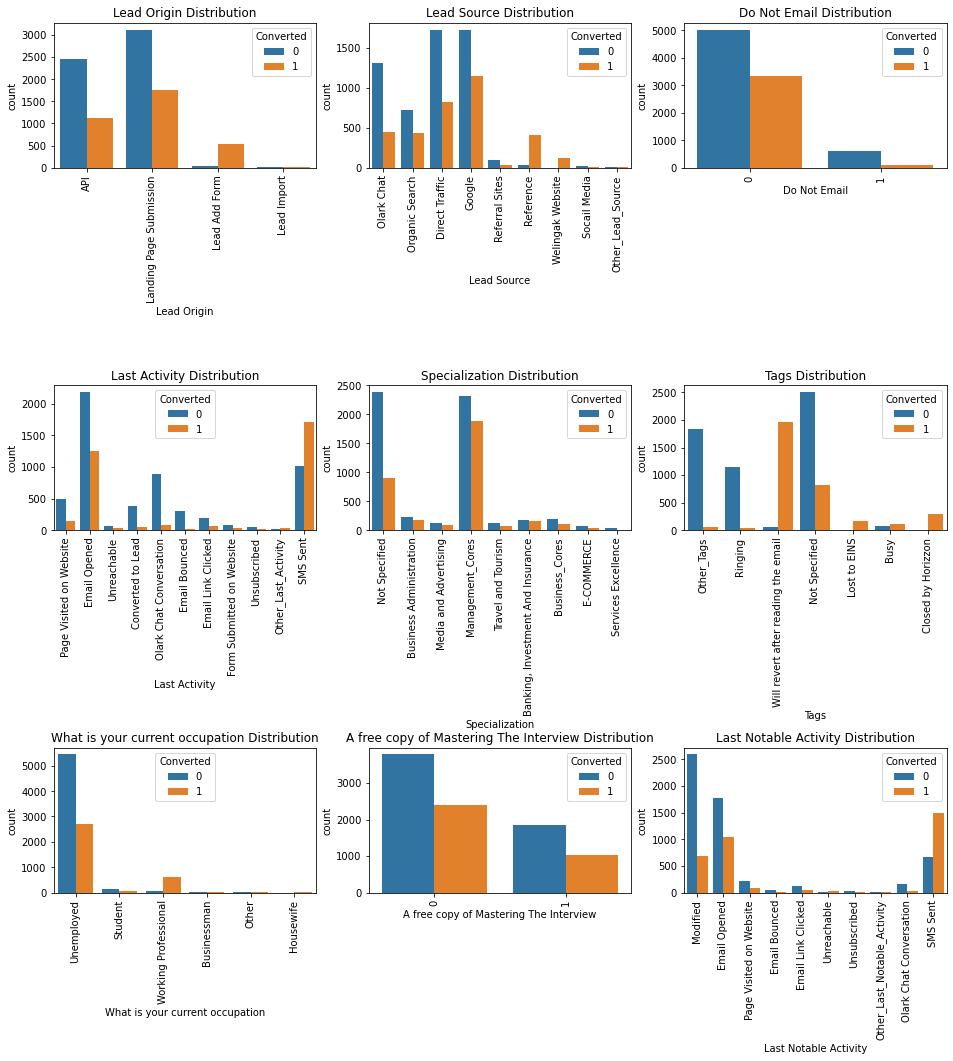

In [89]:
# Visualizing Categorical variables - countplot

plt.figure(figsize=(16,16))
for i in range(len(cat_var)):
    plt.subplot(3, 3, i+1)
    feature = cat_var[i]
    sns.countplot(data = Leads, x = feature, hue = 'Converted')
    plt.title(feature + ' Distribution')
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.subplots_adjust(hspace = 1.5)

Observations :

    1. Lead Origin [Lead Add Form, Landing Page Submission] have a high conversion rate.
    2. If the Lead Source is from Google, Direct Traffic, Reference they seem to be a potential lead with high conversion rates.
    3. Customers who choose 'Do Not Email' seem to have a higher conversion than the customers who opt for Email.
    4. If the Last Activity is SMS_Sent or Email Opened they have a higher chance of being converted.
    5. Customers browsing for various management courses seem to be converted.
    6. Tags with 'Will revert after reading the email' are highest converted followed by Closed by Horizon tags.
    7. High number of Working Professinals and Unemployed leads get converted.
    8. Leads who don't opt for 'A free copy of mastering The Interview' seem to convert more than who opt for it.
    9. If the Last Notable Activity is SMS_Sent or Email Opened then they have a higher chance of being converted.

## Step 3 : Preparing the Data for Modelling

### Dummy Variables

creating dummy variables for the categorical variables - Lead Origin, Lead Source, Last Activity, Specialization, What is your current occupation, Last Notable Activity

We can achieve this by using the get_dummies function.

In [90]:
# Creating dummies

status = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Tags',
                               'What is your current occupation', 'Last Notable Activity']], drop_first=True)
status.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Socail Media,...,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
# check for info

status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Origin_Landing Page Submission                   9074 non-null   uint8
 1   Lead Origin_Lead Add Form                             9074 non-null   uint8
 2   Lead Origin_Lead Import                               9074 non-null   uint8
 3   Lead Source_Google                                    9074 non-null   uint8
 4   Lead Source_Olark Chat                                9074 non-null   uint8
 5   Lead Source_Organic Search                            9074 non-null   uint8
 6   Lead Source_Other_Lead_Source                         9074 non-null   uint8
 7   Lead Source_Reference                                 9074 non-null   uint8
 8   Lead Source_Referral Sites                            9074 non-null   uint8
 9

In [92]:
# checking shape of the dummies created dataframe - status

status.shape

(9074, 49)

In [93]:
# concat the status dataframe created with our Leads dataframe

Leads = pd.concat([Leads, status], axis=1)

In [94]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [95]:
# Drop 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Tags', What is your current occupation',
#             'Last Notable Activity' as we have created the dummies for it.

# Drop 'Specialization_Not Specified','Lead Source_Other_Lead_Source','Tags_Not Specified','Last Activity_Other_Last_Activity',
#             'Last Notable Activity_Other_Last_Notable_Activity' as these are non-significant.

drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Tags','What is your current occupation',
             'Last Notable Activity', 'Specialization_Not Specified','Lead Source_Other_Lead_Source',
             'Tags_Not Specified','Last Activity_Other_Last_Activity', 'Last Notable Activity_Other_Last_Notable_Activity']

Leads.drop(drop_cols, axis = 1, inplace = True)

In [96]:
Leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [97]:
Leads.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Socail Media', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration',
       'Specialization_Business_Cores', 'Specialization_E-COMMERCE',
       'Specialization_Management_Cores',
       'Speci

## Step 4 : Train-Test Split

Splitting the data to Train and Test in a 70:30 ratio

In [98]:
y = Leads['Converted']
X = Leads.drop('Converted', axis=1)

In [99]:
from sklearn.model_selection import train_test_split

# We specify random_state so that the train and test data set always have the same rows, respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,2.0,397,2.0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1012,1,2.0,190,2.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9226,0,0.0,0,0.0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4750,0,2.0,1380,2.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7987,0,5.0,1584,2.5,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   int64  
 3   Page Views Per Visit                                  6351 non-null   float64
 4   A free copy of Mastering The Interview                6351 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 7   Lead Origin_Lead Import                               6351 non-null   uint8  
 8   Lead Source_Google                                    6

### Rescaling

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Here, I have used Standardisation scaling

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [103]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [104]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,-0.284595,-0.160255,-0.179666,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1012,1,-0.284595,-0.540048,-0.179666,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9226,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4750,0,-0.284595,1.643304,-0.179666,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7987,0,0.295588,2.017593,0.058552,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [105]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,6351.000000,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,-3.668141e-16,2.774246e-16,-3.059538e-16,0.315383,0.535979,0.068651,0.003779,0.320737,0.186427,...,0.898284,0.075894,0.018422,0.305464,0.359471,0.019052,0.034483,0.244371,0.004094,0.004409
std,0.269581,1.000079e+00,1.000079e+00,1.000079e+00,0.464705,0.498743,0.252879,0.061362,0.466797,0.389482,...,0.302299,0.264849,0.134483,0.460640,0.479883,0.136719,0.182480,0.429747,0.063857,0.066257
min,0.000000,-6.713838e-01,-8.886503e-01,-1.132538e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.779894e-01,-8.703028e-01,-6.561023e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-9.120076e-02,-4.354671e-01,-1.796662e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.955879e-01,8.002366e-01,4.539939e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.787059e+01,3.195502e+00,1.030193e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


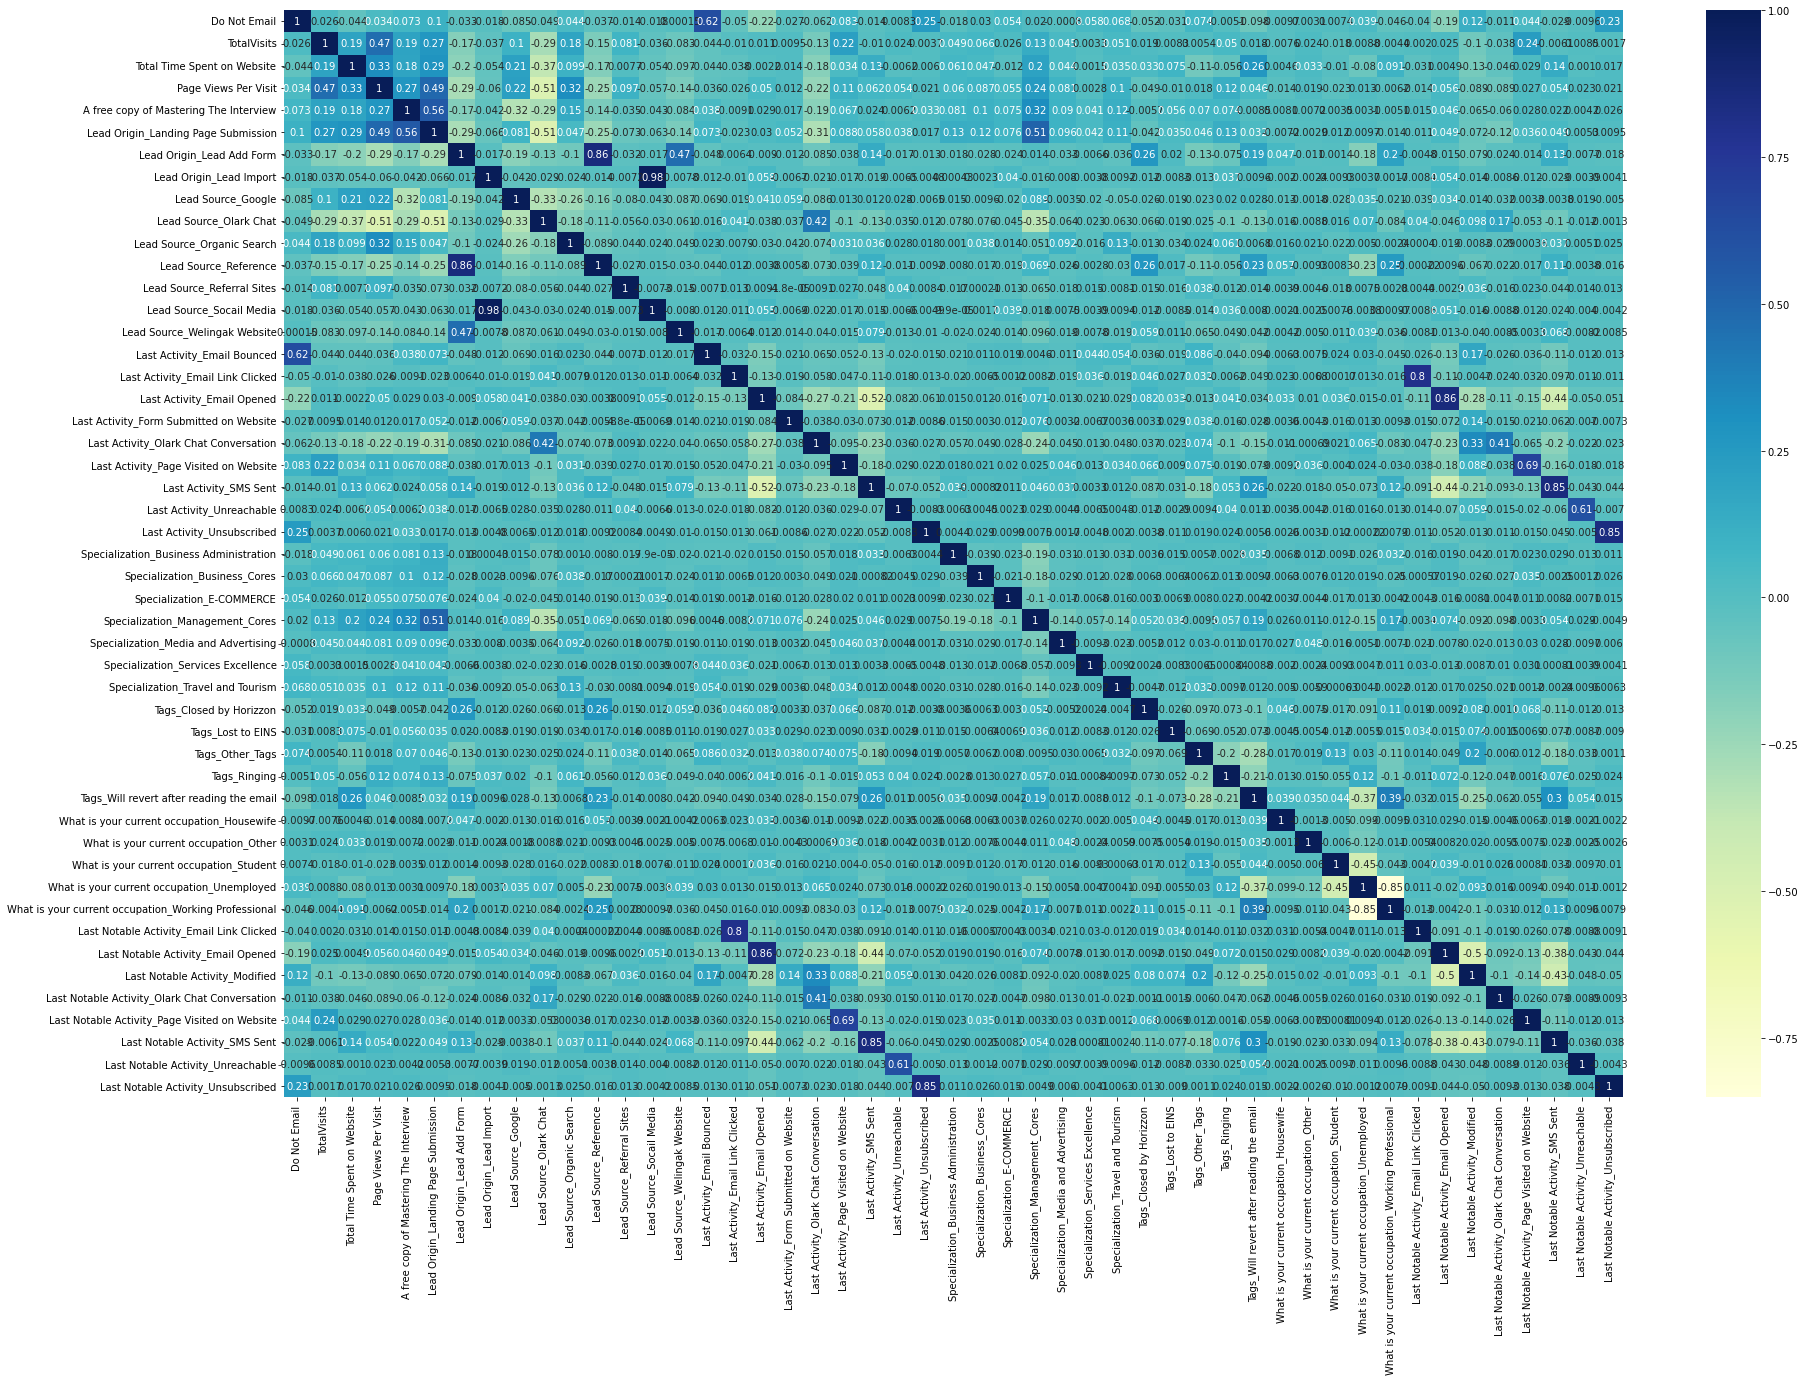

In [106]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

There seem to be a few variables that have some multi-colinearity between them in the dataset, which will be taken care during the model building process.

## Step 5 : Model Building

Currently we have around 50 variables in the dataset the data cleaning adn preparation process, we cannot possibly use all these variables for model building. We have to choose the most appropriate variables/features that add value to our business goal so as to have a high accuracy and sensitivity and specificity.

We will be using both RFE (to narrow down to a small pool from a large number of features) and statsmodel for further feature selection.

Using RFE (Recursive Feature Elimination)

In [107]:
# Importing the libraries required

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [108]:
# Running RFE with the number of output variables equal to 15

lm = LogisticRegression()

rfe = RFE(estimator = lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [109]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Socail Media', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 28),
 ('Last Activity_Form Submitted on Website', False, 32),
 ('Last Activity_Olark Chat Conversation', False, 3),
 ('Last Activity_Page Visited on Website', False, 22),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 12),
 

In [110]:
# The features that are significant

lm = X_train.columns[rfe.support_]
lm

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [111]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Socail Media', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_Business_Cores', 'Specialization_E-COMMERCE',
       'Specialization_Management_Cores',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is y

In [112]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[lm]

### Using Statsmodel to build a Logistic Regression Model

Model building from the RFE selected columns

In [113]:
# Importing the libraries required

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model 1

In [114]:
X_train_lm = sm.add_constant(X_train_rfe)

lgm1 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res = lgm1.fit()

print(res.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.2
Date:                Mon, 20 Mar 2023   Deviance:                       2318.4
Time:                        20:19:18   Pearson chi2:                 8.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6202
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
14,Last Notable Activity_SMS Sent,6.32
6,Last Activity_SMS Sent,6.07
2,Lead Origin_Landing Page Submission,2.27
12,Last Notable Activity_Modified,2.00
3,Lead Origin_Lead Add Form,1.98
11,Tags_Will revert after reading the email,1.83
4,Lead Source_Olark Chat,1.56
1,Total Time Spent on Website,1.45
9,Tags_Other_Tags,1.45
5,Lead Source_Welingak Website,1.36


1. All Column have very less p-value (< 0.005)
2. The VIF value of 'Last Notable Activity_SMS Sent' is high, 6.32

### Model 2

Dropping variable 'Last Notable Activity_SMS Sent' due to high VIF

In [115]:
X = X_train_rfe.drop('Last Notable Activity_SMS Sent', 1,)

X_train_lm = sm.add_constant(X)

lgm2 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial())
res = lgm2.fit()

print(res.summary())


vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1165.3
Date:                Mon, 20 Mar 2023   Deviance:                       2330.7
Time:                        20:19:18   Pearson chi2:                 8.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6194
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Landing Page Submission,2.25
3,Lead Origin_Lead Add Form,1.98
11,Tags_Will revert after reading the email,1.79
12,Last Notable Activity_Modified,1.60
6,Last Activity_SMS Sent,1.57
4,Lead Source_Olark Chat,1.52
1,Total Time Spent on Website,1.45
9,Tags_Other_Tags,1.43
5,Lead Source_Welingak Website,1.36
10,Tags_Ringing,1.28


The Model built seems to have a very low p-value (< 0.005) and VIF (multi-colinearity : < 3) 

In [116]:
# Looking at the coefficient of the features from our final model - model 2

res.params

const                                           -1.069227
Do Not Email                                    -1.108258
Total Time Spent on Website                      1.149540
Lead Origin_Landing Page Submission             -0.871787
Lead Origin_Lead Add Form                        1.333636
Lead Source_Olark Chat                           0.872913
Lead Source_Welingak Website                     3.836835
Last Activity_SMS Sent                           2.122917
Tags_Closed by Horizzon                          6.956559
Tags_Lost to EINS                                6.247952
Tags_Other_Tags                                 -2.273134
Tags_Ringing                                    -3.694847
Tags_Will revert after reading the email         4.952850
Last Notable Activity_Modified                  -1.805236
Last Notable Activity_Olark Chat Conversation   -1.813003
dtype: float64

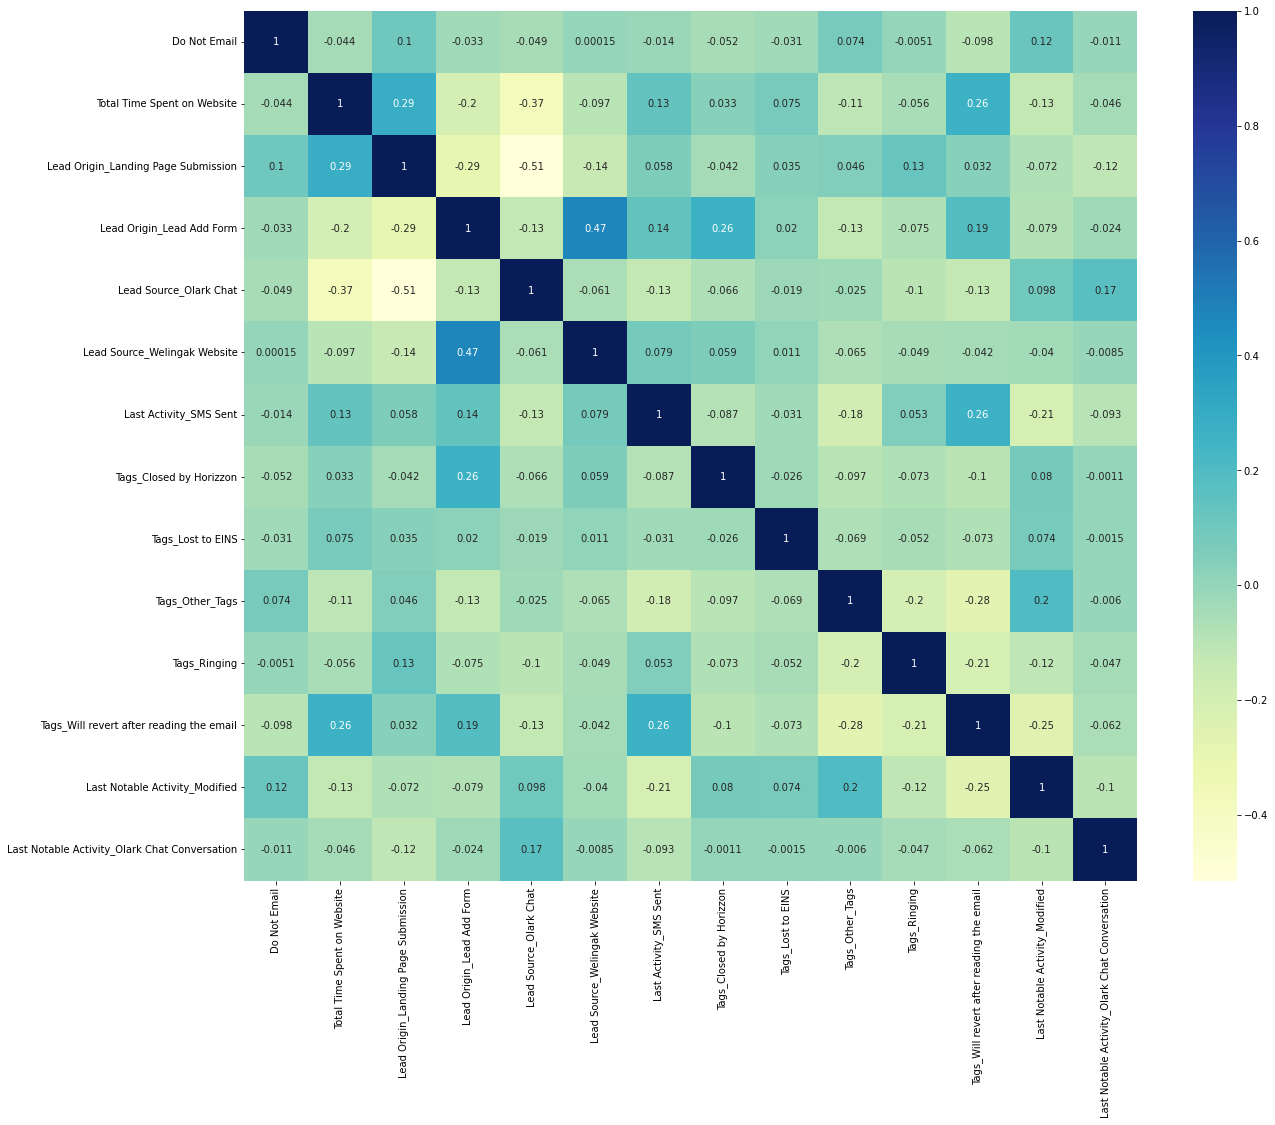

In [117]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 16))
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 6 : Model Evaluation

Predictions on the Train Set

In [118]:
# Getting the Predicted values on the train set - probability of getting a 1 [converted]

y_train_pred = res.predict(X_train_lm)
y_train_pred[ :10]

3009    0.106668
1012    0.024842
9226    0.010001
4750    0.888047
7987    0.999036
1281    0.997951
2880    0.049542
4971    0.962393
7536    0.997897
1248    0.039835
dtype: float64

In [119]:
# Getting it on an array by reshaping

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[ :10]

array([0.10666837, 0.02484164, 0.01000099, 0.88804711, 0.99903645,
       0.99795148, 0.04954232, 0.96239284, 0.99789668, 0.03983457])

In [120]:
# Creating a DataFrame with the actual converted values and the predicted probabilities for getting it converted.

# Converted - actual convert
# Converted_prob - probability of it getting converted

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.106668,3009
1,0,0.024842,1012
2,0,0.010001,9226
3,1,0.888047,4750
4,1,0.999036,7987


#### Creating a new column 'Predicted' with 1 if converted_prob is > 0.5 else 0

In [121]:
# A column for the probability cut off of 0.5

y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x : 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.106668,3009,0
1,0,0.024842,1012,0
2,0,0.010001,9226,0
3,1,0.888047,4750,1
4,1,0.999036,7987,1


In [122]:
# Importing the libraries required 

from sklearn import metrics

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [123]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3758  147]
 [ 277 2169]]


In [124]:
# Actual/Predicted    Not-Converted      Converted

# Not-Converted       True-Negative      False-Positive
# Converted           False-Negative     True-Positive

##### The overall Acuuracy

In [125]:
# Chekcing the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9332388600220438


##### Metric beyond simple accuracy

Sensitivity - measure of actual positives that are correctly identified by the model
-  Sensitivity = True Positives / (True Positives + False Negatives)

specificity - measure of actual negatives that are correctly identified by the model
-  Specificity = True Negatives / (True Negatives + False Positives)

Precision - measure of how many of the positively classified instances are actually positive by the model
-  Precision = True Positive / (True Positive + False Positive)

Recall - measure of how many actual positive instances the model was able to identify
-  Recall = True Positive / (True Positive + False Negative)

In [126]:
TP = confusion[1,1]    # true positive 
TN = confusion[0,0]    # true negatives
FP = confusion[0,1]    # false positives
FN = confusion[1,0]    # false negatives

In [127]:
# Checking the sensitivity of our model built

TP / float(TP+FN)

0.8867538838920687

In [128]:
# Checking the specificity of our model built

TN / float(TN+FP)

0.9623559539052496

In [129]:
# Checking the Precision of our model built

precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.9365284974093264

In [130]:
# Checking the Recall of our model built

recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8867538838920687

In [131]:
# Plotting the trade off between Precision and Recall

y_train_pred_final.Converted, y_train_pred_final.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

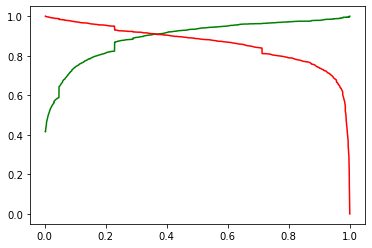

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Plotting the ROC Curve

In [133]:
# Defining the function to plot the ROC curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

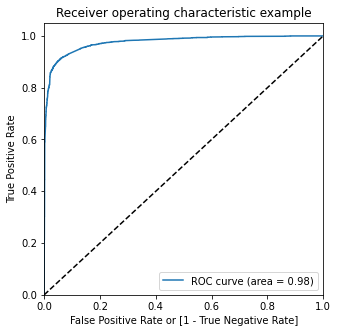

In [135]:
# Calling draw_roc to draw the ROC curve for our Model

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The Area under the ROC curve is 0.98 (~1.0), which means the model built is a good predictive model

#### Finding the Optimal Threshold

We have previously chosen a random cut off (0.5) to start off the prediction with. Now, we will be choosing the optimal cut off to achieve a better values of evaluation metric (accuracy, sensitivity, specificity)

In [136]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.106668,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.024842,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.010001,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.888047,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.999036,7987,1,1,1,1,1,1,1,1,1,1,1


In [137]:
# Calculating the accuracy, sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:    
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.860022     0.972200     0.789757
0.2   0.2  0.898756     0.954211     0.864020
0.3   0.3  0.926468     0.919460     0.930858
0.4   0.4  0.931979     0.904334     0.949296
0.5   0.5  0.933239     0.886754     0.962356
0.6   0.6  0.932137     0.868765     0.971831
0.7   0.7  0.926468     0.841783     0.979513
0.8   0.8  0.910093     0.789452     0.985659
0.9   0.9  0.893718     0.739575     0.990269


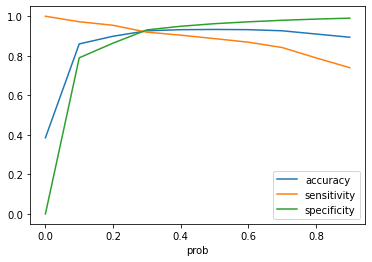

In [138]:
# Plotting the accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, the optimal threshold value of the cut off is 0.3

#### Creating a column 'Final_Predicted' to get values for the cut off with 0.3

In [139]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.106668,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.024842,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.010001,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.888047,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.999036,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [140]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
print(confusion)

[[3635  270]
 [ 197 2249]]


#### The overall Acuuracy

In [141]:
# Chekcing the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

0.9264682727129586


#### Metric beyond simple accuracy

In [142]:
TP = confusion[1,1]    # true positive 
TN = confusion[0,0]    # true negatives
FP = confusion[0,1]    # false positives
FN = confusion[1,0]    # false negatives

In [143]:
# Checking the sensitivity of our model built

TP / float(TP+FN)

0.919460343417825

In [144]:
# Checking the specificity of our model built

TN / float(TN+FP)

0.9308578745198464

This cut off seems to be good in terms of increasing the sensitivity of the model. As the business model suggests our goal is to get a high sensivity rate (predict the correct/actual true positive)

In [145]:
# Checking the Precision of our model built

precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted)

0.8928146089718142

In [146]:
# Checking the Recall of our model built

recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.919460343417825

In [147]:
# Plotting the trade off between Precision and Recall

y_train_pred_final.Converted, y_train_pred_final.Final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

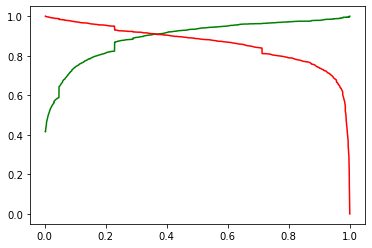

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### To cummulate our statistics so far on Train Data:
    
    1. Area under ROC Curve - 0.98
    2. Confusion matrix - [[3635  270]
                           [ 197 2249]]
    3. Accuracy - 92.64 %
    4. Sensitivity - 91.94 %
    5. Specificity - 93.08 %
    6. Precision - 89.28 %
    7. Recall - 91.94 %

## Step 7 : Prediction on the test set

Applying the scaling on the test sets

In [149]:
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [150]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0,0.102194,-0.600595,0.773206,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1490,0,0.295588,1.887326,1.249642,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7936,0,-0.284595,-0.752879,-0.179666,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4216,0,-0.671384,-0.888650,-1.132538,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3830,0,0.875771,-0.587751,2.678951,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [151]:
X_test.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,...,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000
mean,0.078957,-0.010022,-0.008906,-0.011040,0.325009,0.543885,0.053250,0.002203,0.307014,0.208961,...,0.901212,0.071612,0.020566,0.324275,0.361366,0.022769,0.036357,0.220345,0.002203,0.006243
std,0.269721,0.780925,1.001335,1.095258,0.468464,0.498162,0.224573,0.046898,0.461340,0.406641,...,0.298432,0.257892,0.141951,0.468189,0.480485,0.149194,0.187211,0.414556,0.046898,0.078781
min,0.000000,-0.671384,-0.888650,-1.132538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.477989,-0.866633,-0.656102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.091201,-0.446476,-0.179666,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.295588,0.813997,0.296770,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,13.639797,3.279901,25.071450,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
#Selecting the variables that were part of final model.

lgm2 = X.columns
X_test = X_test[lgm2]


# Adding constant variable to test dataframe

X_test_lm = sm.add_constant(X_test)

In [153]:
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2723 entries, 3271 to 376
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   const                                          2723 non-null   float64
 1   Do Not Email                                   2723 non-null   int64  
 2   Total Time Spent on Website                    2723 non-null   float64
 3   Lead Origin_Landing Page Submission            2723 non-null   uint8  
 4   Lead Origin_Lead Add Form                      2723 non-null   uint8  
 5   Lead Source_Olark Chat                         2723 non-null   uint8  
 6   Lead Source_Welingak Website                   2723 non-null   uint8  
 7   Last Activity_SMS Sent                         2723 non-null   uint8  
 8   Tags_Closed by Horizzon                        2723 non-null   uint8  
 9   Tags_Lost to EINS                              272

Predictions on the Test Set

In [154]:
y_test_pred = res.predict(X_test_lm)
y_test_pred[ :10]

3271    0.146836
1490    0.994411
7936    0.126232
4216    0.987802
3830    0.068074
1800    0.895724
6507    0.013893
4821    0.021940
4223    0.998201
4714    0.289015
dtype: float64

In [155]:
y_test_pred_final = pd.DataFrame({'Converted': y_test, 'Converted_prob': y_test_pred})
y_test_pred_final['Prospect ID'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,Prospect ID
3271,0,0.146836,3271
1490,1,0.994411,1490
7936,0,0.126232,7936
4216,1,0.987802,4216
3830,0,0.068074,3830


In [156]:
# Rearranging the columns and assigning the Lead scores for them

y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
3271,3271,0,0.146836,15
1490,1490,1,0.994411,99
7936,7936,0,0.126232,13
4216,4216,1,0.987802,99
3830,3830,0,0.068074,7


Creating a new column 'Final_Predicted' with 1 if converted_prob is > 0.3 else 0

In [157]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [158]:
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,Final_Predicted
3271,3271,0,0.146836,15,0
1490,1490,1,0.994411,99,1
7936,7936,0,0.126232,13,0
4216,4216,1,0.987802,99,1
3830,3830,0,0.068074,7,0


In [159]:
# Checking the overall accuracy

metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.9177377892030848

In [160]:
# Confusion Matrix

confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
confusion2

array([[1606,  128],
       [  96,  893]], dtype=int64)

##### Metric beyond simple accuracy

In [161]:
TP = confusion2[1,1]     # true positive 
TN = confusion2[0,0]     # true negatives
FP = confusion2[0,1]     # false positives
FN = confusion2[1,0]     # false negatives

In [162]:
# Checking the sensitivity of our model built on test data

TP / float(TP+FN)

0.9029322548028311

In [163]:
# Checking the specificity of our model built on test data
TN / float(TN+FP)

0.9261822376009228

In [164]:
# Checking the Precision of our model built on test data

precision_score(y_test_pred_final.Converted , y_test_pred_final.Final_Predicted)

0.8746327130264446

In [165]:
# Checking the Recall of our model built on test data

recall_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.9029322548028311

In [166]:
# Plotting the trade off between Precision and Recall on the test data

y_test_pred_final.Converted, y_test_pred_final.Final_Predicted
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

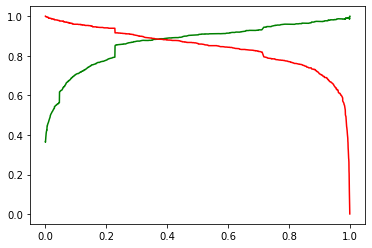

In [167]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### To cummulate our statistics so far on Test Data:

    1. Confusion matrix - [[1606,  128],
                           [  96,  893]]
    2. Accuracy - 91.77 %
    3. Sensitivity - 90.29 %
    4. Specificity - 92.61 %
    5. Precision - 87.46 %
    6. Recall - 90.29 %

### Final Observations (Train and Test Data):

##### Train Data: 

    1. Confusion matrix - [[3635  270]
                           [ 197 2249]]
    2. Accuracy - 92.64 %
    3. Sensitivity - 91.94 %
    4. Specificity - 93.08 %
    5. Precision - 89.28 %
    6. Recall - 91.94 %
    
##### Test Data: 

    1. Confusion matrix - [[1606,  128],
                           [  96,  893]]
    2. Accuracy - 91.77 %
    3. Sensitivity - 90.29 %
    4. Specificity - 92.61 %
    5. Precision - 87.46 %
    6. Recall - 90.29 %

#### Based on the final model, the top 3 features contributing significantly towards explaining the demand of the probability of a lead getting converted:

1. Tags_Closed by Horizzon - with a coefficient value of ‘6.956559’ 
2. Tags_Lost to EINS - with a coefficient value of ‘6.247952’ 
3. Tags_Will revert after reading the email - with a coefficient value of ‘4.952850’ 

##### Summary

We can see that when the leads are marked with tags such as 'Closed by Horizzon', 'Lost to EINS', 'Will revert after reading the email' are likely to get converted to paid customers and are considered as hot/potential leads. Likewise, leads from sources like Welingak Website or last activity is a SMS Sent they are likely to be converted to paid customers. The sales team must monitor the leads coming from these sources and occupation and be quick with their first approach or send out brochures to lock the client at the earliest. Also, if a user is spending more time on the website browsing for courses, that user is likely a potential lead, so the sales team has to keep an eye out for users spending a high total time on their website as well. These leads would be the potential leads that will be converted if given the time and effort from the sales team. Which could increase the coversion from 30% upto or more than 80%.

The sales team can come to a conclusion internally that if the lead score is greater than 90 then they can invest more time in a day to these customers for a better conversion rate and gradually decrease the time invested in each customer as the lead score decreases.